In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

negative_path = "/content/drive/MyDrive/Control_Mg_Negative.csv"
positive_path = "/content/drive/MyDrive/Control_Mg_Positive.csv"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import rankdata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import tensorflow as tf
from tensorflow.keras import layers

sns.set(style="whitegrid")

%matplotlib inline

In [ ]:
positive_data = pd.read_csv(positive_path)
negative_data = pd.read_csv(negative_path)
positive_data

In [ ]:
positive_data = positive_data[positive_data['Sample'] != 'Compound75']
positive_data

,Sample,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,Label,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,Compound2078,7.206298,7.227946,7.366802,7.262313,7.285364,6.998687,7.132948,7.160038,7.390819,...,7.315623,7.350978,7.169137,7.067084,7.070416,7.081180,7.214982,7.140902,7.017724,7.153893
2,Compound4363,7.339353,7.345237,7.556745,7.465671,7.472435,7.174356,7.553920,7.135764,7.356667,...,7.490783,6.872999,7.397464,7.300424,7.600194,7.339486,7.181688,7.452621,7.474829,7.069202
3,Compound13589,6.643306,6.687743,6.465109,6.558714,6.760262,6.825837,6.609359,6.776504,6.503055,...,6.635033,6.817662,6.590528,6.496227,6.626065,6.712181,6.720424,6.837801,6.744136,6.633435
4,Compound5278,6.844170,6.682059,6.855306,6.786066,6.608705,6.962785,6.917193,6.859684,6.852445,...,6.705961,7.050534,6.804359,6.942128,6.721300,6.783166,6.629169,6.911243,6.798165,6.971550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,Compound15751,5.942907,5.812424,6.014887,5.973371,5.923199,5.954896,5.984806,5.703635,5.837919,...,5.921067,5.786371,5.970959,6.012363,6.097851,5.910447,5.954089,5.794707,5.841617,5.954547
11588,Compound15759,5.897462,5.956110,5.956139,5.909347,6.049577,5.902071,5.928563,6.002281,5.963314,...,5.923813,5.701904,5.948298,5.934399,5.808896,5.880014,5.969594,5.950216,5.893222,5.816031
11589,Compound15767,5.857506,5.922598,5.858036,5.907506,5.823600,5.905061,6.008754,5.748952,5.955079,...,5.871754,5.889129,5.896064,6.004864,5.833496,5.881322,6.039688,6.070650,5.840757,5.984992
11590,Compound15771,5.974184,5.815394,5.826349,5.945384,5.977391,5.961304,5.615242,5.892542,5.894168,...,5.811251,5.738694,5.925044,6.011235,5.757122,5.852222,5.872955,5.984447,5.843946,5.875227


In [ ]:
negative_data

,Sample,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28
0,Compound Annotation,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,Compound 468,7.475505,7.329756,6.811946,7.385248,7.626119,7.590575,7.403692,7.287125,7.355329,...,7.507965,7.435537,7.330367,7.367307,7.418969,7.351389,7.670616,7.412378,7.425305,7.367272
2,Compound 3382,6.989769,7.080236,6.889824,6.213607,6.722271,7.013836,7.060645,6.783460,7.001999,...,7.101507,6.887513,6.854224,7.062717,6.753966,6.863752,6.722227,6.822723,6.745978,6.775755
3,Compound 4793,6.819188,6.868873,6.843599,6.922629,6.833867,6.737740,6.826248,6.793886,6.845979,...,6.743371,6.835760,6.805242,6.758864,6.780618,6.735840,6.859521,6.907125,6.843397,6.905871
4,Compound 2186,6.858738,6.787733,6.856540,6.970408,6.947345,6.949742,7.394426,6.916902,6.692923,...,6.995888,6.905149,6.875869,6.914752,6.960787,6.756019,6.932341,6.792646,6.878472,6.970429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,Compound 5919,6.245255,6.194300,6.165928,6.390953,6.402920,6.258669,6.262649,6.370278,6.256610,...,6.269349,6.284218,6.166841,6.263467,6.387067,6.334254,6.145515,6.364408,6.246458,6.258794
5202,Compound 5930,6.265979,6.269323,6.296698,6.347539,6.403661,6.362765,6.222485,6.277444,6.303384,...,6.320016,6.411511,6.379362,6.353872,6.367754,6.400277,6.367340,6.348874,6.343532,6.375171
5203,Compound 5964,6.242246,6.124306,6.177051,6.082200,6.317291,6.257584,6.223415,6.282368,6.305714,...,6.201274,6.219690,6.144898,6.269480,6.191840,6.193191,6.295073,6.268855,6.180628,6.218116
5204,Compound 5978,6.157839,6.032436,6.130037,6.045991,6.050399,6.133175,6.040674,6.042695,6.117320,...,6.161811,6.124916,6.129828,6.095715,6.096871,6.076834,6.058739,6.199614,5.997863,5.999938


In [ ]:
positive_data = positive_data.drop(0,axis = 0)
negative_data = negative_data.drop(0,axis = 0)

In [ ]:
#samplewise statistics for positive data
positive_data.iloc[:, 1:].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
count,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,...,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000
mean,6.996189,6.985335,6.985900,6.977418,6.979033,6.970862,6.983763,6.964762,6.968063,6.976285,...,6.973523,6.970025,6.953668,6.974543,6.971951,6.964552,6.964708,6.975595,6.985603,6.968898
std,0.638724,0.643333,0.620399,0.661015,0.624308,0.628079,0.600565,0.629786,0.647512,0.639617,...,0.638162,0.653236,0.640896,0.619910,0.625749,0.622947,0.636654,0.616378,0.656123,0.641925
min,5.368226,5.272065,5.415173,4.971511,4.577114,5.394722,5.422743,5.293747,5.250955,5.022760,...,4.946556,5.297388,5.216584,5.405805,5.289029,5.220254,5.220683,5.224297,5.195807,5.156223
25%,6.679947,6.680167,6.676157,6.671195,6.670774,6.666906,6.670927,6.672368,6.673108,6.672764,...,6.670571,6.677595,6.669463,6.672325,6.676029,6.672995,6.669989,6.671761,6.670072,6.669533
50%,6.945850,6.940959,6.937700,6.942052,6.929326,6.930755,6.929528,6.933875,6.932632,6.936818,...,6.939904,6.934977,6.928000,6.929225,6.935615,6.927390,6.933957,6.937412,6.942473,6.931009
75%,7.331830,7.320515,7.306781,7.326782,7.300640,7.304425,7.305409,7.287922,7.304510,7.317739,...,7.311619,7.303472,7.287448,7.300329,7.298465,7.291725,7.292796,7.304164,7.325411,7.300772
max,10.381825,10.282138,10.282857,10.218109,10.196735,10.045613,10.218121,10.252226,10.128700,10.155481,...,10.393735,10.427216,10.259286,10.293810,10.060923,10.095066,10.162627,9.984048,10.335540,10.197142


In [ ]:
#samplewise statistics for negative data
negative_data.iloc[:, 1:].describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28
count,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,...,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000
mean,7.088989,7.092271,7.078525,7.075488,7.075191,7.087294,7.089151,7.084638,7.077268,7.090120,...,7.080864,7.067163,7.075454,7.088710,7.059228,7.069885,7.075978,7.078043,7.067329,7.072145
std,0.578480,0.568823,0.584924,0.587508,0.572077,0.584182,0.578371,0.570221,0.569626,0.575367,...,0.555123,0.566367,0.597044,0.583146,0.562322,0.587103,0.555261,0.557836,0.552304,0.566090
min,5.530975,5.667683,5.443891,5.510296,5.533868,5.543956,5.565442,5.632375,5.595055,5.606844,...,5.673660,5.514384,5.400301,5.573647,5.515034,5.253933,5.640595,5.612401,5.608310,5.577736
25%,6.758468,6.761539,6.755805,6.755341,6.759622,6.764535,6.762915,6.758435,6.758332,6.758608,...,6.752571,6.752777,6.752158,6.759918,6.755757,6.756050,6.762455,6.757105,6.755924,6.754552
50%,6.991434,6.991715,6.989708,6.990831,6.976311,6.991497,6.990294,6.985199,6.988040,6.991822,...,6.980287,6.975863,6.986959,6.991685,6.970714,6.980791,6.979874,6.981884,6.979500,6.979923
75%,7.371389,7.365837,7.357220,7.352454,7.347822,7.370661,7.370892,7.363706,7.349550,7.365358,...,7.353290,7.349423,7.360592,7.372487,7.315471,7.344013,7.334904,7.339500,7.333296,7.360231
max,10.313452,10.517358,10.175624,10.251454,10.252820,10.341428,10.081599,10.442653,10.342311,10.305869,...,10.420173,10.574945,10.312091,10.035146,10.478896,10.243467,10.366128,10.345576,10.522268,10.090550


In [ ]:

#so null values present is about 0
print(positive_data.isna().sum().sum())
print(negative_data.isna().sum().sum())

0
0


In [ ]:


data = pd.concat([positive_data,negative_data],axis = 0)
data.reset_index(drop=True, inplace=True)


In [ ]:
#null values created
data.isna().sum().sum()

10410

In [ ]:
okk = data.isna()
okk


,Sample,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16790,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
16791,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
16792,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
16793,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
missing_indices = []
for i, row in okk.iterrows():
    for j, value in row.items():
        if value:  # If value is True (indicating missing value)
            missing_indices.append((i, j))

print(len(missing_indices))

10410


In [ ]:
data_1 = data.copy()
imputer = KNNImputer(n_neighbors=18, weights='uniform', metric='nan_euclidean')
okk = imputer.fit_transform(data_1.iloc[:,9:])
data_1.iloc[:,9:] = pd.DataFrame(okk, columns = data_1.columns[9:])
data_1

,Sample,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,Compound2078,7.206298,7.227946,7.366802,7.262313,7.285364,6.998687,7.132948,7.160038,7.390819,...,7.315623,7.350978,7.169137,7.067084,7.070416,7.081180,7.214982,7.140902,7.017724,7.153893
1,Compound4363,7.339353,7.345237,7.556745,7.465671,7.472435,7.174356,7.553920,7.135764,7.356667,...,7.490783,6.872999,7.397464,7.300424,7.600194,7.339486,7.181688,7.452621,7.474829,7.069202
2,Compound13589,6.643306,6.687743,6.465109,6.558714,6.760262,6.825837,6.609359,6.776504,6.503055,...,6.635033,6.817662,6.590528,6.496227,6.626065,6.712181,6.720424,6.837801,6.744136,6.633435
3,Compound5278,6.844170,6.682059,6.855306,6.786066,6.608705,6.962785,6.917193,6.859684,6.852445,...,6.705961,7.050534,6.804359,6.942128,6.721300,6.783166,6.629169,6.911243,6.798165,6.971550
4,Compound1640,7.889506,8.302098,8.159361,8.276149,8.310145,7.928198,8.197410,7.913904,8.089097,...,8.184827,8.134914,7.995202,7.919273,8.186343,8.363670,8.159116,7.861378,8.238864,7.689810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16790,Compound 5919,6.245255,6.194300,6.165928,6.390953,6.402920,6.258669,6.262649,6.370278,6.256610,...,6.166841,6.263467,6.387067,6.334254,6.145515,6.364408,6.246458,6.258794,6.264900,6.300099
16791,Compound 5930,6.265979,6.269323,6.296698,6.347539,6.403661,6.362765,6.222485,6.277444,6.303384,...,6.379362,6.353872,6.367754,6.400277,6.367340,6.348874,6.343532,6.375171,6.304681,6.379278
16792,Compound 5964,6.242246,6.124306,6.177051,6.082200,6.317291,6.257584,6.223415,6.282368,6.305714,...,6.144898,6.269480,6.191840,6.193191,6.295073,6.268855,6.180628,6.218116,6.222105,6.185317
16793,Compound 5978,6.157839,6.032436,6.130037,6.045991,6.050399,6.133175,6.040674,6.042695,6.117320,...,6.129828,6.095715,6.096871,6.076834,6.058739,6.199614,5.997863,5.999938,6.089855,6.111005


In [ ]:
feature_data = data_1.T
positive_data = pd.read_csv(positive_path)
okk = positive_data.T
feature_data[16796] = okk[0]

In [ ]:
feature_data.columns = feature_data.iloc[0]
feature_data = feature_data.drop('Sample')
feature_data

Sample,Compound2078,Compound4363,Compound13589,Compound5278,Compound1640,Compound1644,Compound14195,Compound1725,Compound10230,Compound11327,...,Compound 5864,Compound 5869,Compound 5891,Compound 5900,Compound 5919,Compound 5930,Compound 5964,Compound 5978,Compound 5980,Label
S1,7.206298,7.339353,6.643306,6.84417,7.889506,7.397869,6.556941,7.556308,6.956883,6.661771,...,6.45122,6.537409,6.293003,6.332792,6.245255,6.265979,6.242246,6.157839,5.683136,1.0
S2,7.227946,7.345237,6.687743,6.682059,8.302098,7.073804,6.475848,7.584376,6.931647,6.731832,...,6.342426,6.482791,6.407777,6.351458,6.1943,6.269323,6.124306,6.032436,5.884875,1.0
S3,7.366802,7.556745,6.465109,6.855306,8.159361,7.180634,6.600726,7.782393,6.828272,6.798851,...,6.365171,6.536428,6.473196,6.313976,6.165928,6.296698,6.177051,6.130037,5.765027,1.0
S4,7.262313,7.465671,6.558714,6.786066,8.276149,7.376412,6.666045,7.558829,6.820814,6.686754,...,6.350146,6.486427,6.437306,6.408881,6.390953,6.347539,6.0822,6.045991,5.616814,1.0
S5,7.285364,7.472435,6.760262,6.608705,8.310145,7.262928,6.538886,7.72045,6.89713,6.66785,...,6.412558,6.364361,6.449154,6.274385,6.40292,6.403661,6.317291,6.050399,5.886334,1.0
S6,6.998687,7.174356,6.825837,6.962785,7.928198,7.216227,6.623064,7.517319,6.672121,6.78445,...,6.411341,6.51427,6.419122,6.342484,6.258669,6.362765,6.257584,6.133175,5.653571,1.0
S7,7.132948,7.55392,6.609359,6.917193,8.19741,7.17679,6.693175,7.527826,6.900015,6.732847,...,6.383081,6.349379,6.435712,6.401976,6.262649,6.222485,6.223415,6.040674,5.901391,1.0
S8,7.160038,7.135764,6.776504,6.859684,7.913904,7.25132,6.717806,7.855232,6.777407,6.714273,...,6.418244,6.38073,6.447258,6.362343,6.370278,6.277444,6.282368,6.042695,5.905859,1.0
S9,7.390819,7.356667,6.503055,6.852445,8.089097,7.137726,6.66098,7.581239,6.793679,6.599669,...,6.393926,6.495857,6.373951,6.348692,6.25661,6.303384,6.305714,6.11732,5.715543,2.0
S10,7.154482,7.285962,6.491681,6.974768,8.222929,7.617274,6.645188,7.975537,6.75895,6.746146,...,6.409146,6.535594,6.457081,6.468728,6.339981,6.297272,6.211835,6.018717,5.695217,2.0


In [ ]:
feature_data = feature_data.astype(float)
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, S1 to S30
Columns: 16796 entries, Compound2078 to Label
dtypes: float64(16796)
memory usage: 3.8+ MB


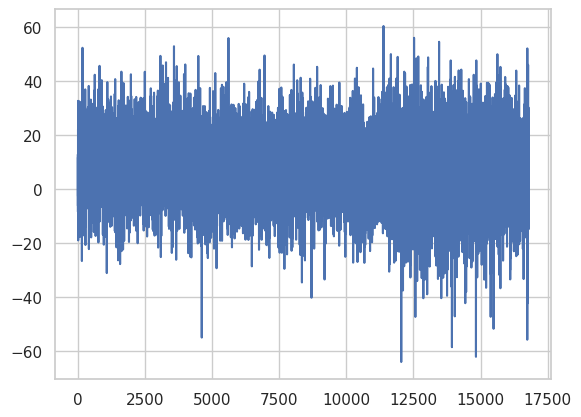

In [ ]:
from scipy.stats import boxcox
lambdas = []

for i in feature_data.columns[:-1]:
  feature_data[i],okk = boxcox(feature_data[i])
  lambdas.append(okk)

plt.plot(lambdas)
plt.show()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# #scaling of data on same scale for further analysis(Z-score normalization)
# std_scale = MinMaxScaler()
# feature_data[feature_data.columns[:-1]]= std_scale.fit_transform(feature_data[feature_data.columns[:-1]])
# feature_data

#scaling of data on same scale for further analysis(Z-score normalization)
std_scale = StandardScaler()
feature_data[feature_data.columns[:-1]]= std_scale.fit_transform(feature_data[feature_data.columns[:-1]])
feature_data

Sample,Compound2078,Compound4363,Compound13589,Compound5278,Compound1640,Compound1644,Compound14195,Compound1725,Compound10230,Compound11327,...,Compound 5864,Compound 5869,Compound 5891,Compound 5900,Compound 5919,Compound 5930,Compound 5964,Compound 5978,Compound 5980,Label
S1,0.054180,-0.100584,-0.072038,0.031804,-1.359991,0.734368,-0.553593,-0.505212,1.459589,-0.629294,...,1.198207,1.178092,-1.528730,-0.594721,-0.708391,-1.151307,0.539402,1.330264,-0.725607,1.0
S2,0.185447,-0.063551,0.326378,-1.445199,1.080558,-0.857874,-1.100562,-0.370098,1.116944,0.318566,...,-0.633603,0.297903,-0.113692,-0.299673,-1.373940,-1.104287,-1.551825,-1.016591,1.141513,1.0
S3,0.964752,1.528995,-1.480277,0.121679,0.081117,-0.304521,-0.192816,0.813981,-0.001899,1.570607,...,-0.268681,1.161314,0.934590,-0.875828,-1.721014,-0.693081,-0.605668,0.873848,-0.031110,1.0
S4,0.388220,0.776949,-0.776755,-0.460003,0.884676,0.636588,0.448993,-0.493366,-0.067507,-0.326771,...,-0.510781,0.353246,0.334744,0.718840,1.529269,0.209630,-2.320200,-0.724508,-1.231284,1.0
S5,0.520463,0.829147,1.021200,-2.231341,1.142657,0.102119,-0.688137,0.395857,0.695941,-0.558950,...,0.521862,-1.279529,0.525862,-1.417511,1.737433,1.458325,1.825129,-0.632145,1.157030,1.0
S6,-1.358487,-1.006378,1.700056,0.922685,-1.184236,-0.126612,0.011772,-0.681381,-1.061151,1.267452,...,0.501035,0.792182,0.054024,-0.443589,-0.523742,0.519884,0.804961,0.926627,-0.957016,1.0
S7,-0.411969,1.503999,-0.363085,0.597063,0.329463,-0.323922,0.757405,-0.635181,0.729151,0.334731,...,0.025234,-1.450762,0.309545,0.586933,-0.468183,-1.705423,0.211390,-0.837863,1.319016,1.0
S8,-0.235863,-1.184963,1.184743,0.156637,-1.250253,0.045758,1.061314,1.370491,-0.415758,0.050721,...,0.619530,-1.085680,0.494829,-0.119813,1.178874,-0.987260,1.231034,-0.794680,1.367735,1.0
S9,1.089264,0.009396,-1.204284,0.098720,-0.345795,-0.523221,0.394303,-0.385557,-0.291661,-1.242068,...,0.206059,0.498880,-0.581774,-0.344437,-0.552353,-0.585168,1.628998,0.653137,-0.460422,2.0
S10,-0.271599,-0.420876,-1.288302,1.005000,0.503149,1.678651,0.229339,2.467083,-0.547809,0.553931,...,0.463530,1.147100,0.657473,1.982945,0.685938,-0.683938,0.008594,-1.323067,-0.628184,2.0


In [ ]:
feature_data['Label'] = feature_data['Label'].apply(lambda x: 1 if x == 1 else 0)
feature_data

Sample,Compound2078,Compound4363,Compound13589,Compound5278,Compound1640,Compound1644,Compound14195,Compound1725,Compound10230,Compound11327,...,Compound 5864,Compound 5869,Compound 5891,Compound 5900,Compound 5919,Compound 5930,Compound 5964,Compound 5978,Compound 5980,Label
S1,0.054180,-0.100584,-0.072038,0.031804,-1.359991,0.734368,-0.553593,-0.505212,1.459589,-0.629294,...,1.198207,1.178092,-1.528730,-0.594721,-0.708391,-1.151307,0.539402,1.330264,-0.725607,1
S2,0.185447,-0.063551,0.326378,-1.445199,1.080558,-0.857874,-1.100562,-0.370098,1.116944,0.318566,...,-0.633603,0.297903,-0.113692,-0.299673,-1.373940,-1.104287,-1.551825,-1.016591,1.141513,1
S3,0.964752,1.528995,-1.480277,0.121679,0.081117,-0.304521,-0.192816,0.813981,-0.001899,1.570607,...,-0.268681,1.161314,0.934590,-0.875828,-1.721014,-0.693081,-0.605668,0.873848,-0.031110,1
S4,0.388220,0.776949,-0.776755,-0.460003,0.884676,0.636588,0.448993,-0.493366,-0.067507,-0.326771,...,-0.510781,0.353246,0.334744,0.718840,1.529269,0.209630,-2.320200,-0.724508,-1.231284,1
S5,0.520463,0.829147,1.021200,-2.231341,1.142657,0.102119,-0.688137,0.395857,0.695941,-0.558950,...,0.521862,-1.279529,0.525862,-1.417511,1.737433,1.458325,1.825129,-0.632145,1.157030,1
S6,-1.358487,-1.006378,1.700056,0.922685,-1.184236,-0.126612,0.011772,-0.681381,-1.061151,1.267452,...,0.501035,0.792182,0.054024,-0.443589,-0.523742,0.519884,0.804961,0.926627,-0.957016,1
S7,-0.411969,1.503999,-0.363085,0.597063,0.329463,-0.323922,0.757405,-0.635181,0.729151,0.334731,...,0.025234,-1.450762,0.309545,0.586933,-0.468183,-1.705423,0.211390,-0.837863,1.319016,1
S8,-0.235863,-1.184963,1.184743,0.156637,-1.250253,0.045758,1.061314,1.370491,-0.415758,0.050721,...,0.619530,-1.085680,0.494829,-0.119813,1.178874,-0.987260,1.231034,-0.794680,1.367735,1
S9,1.089264,0.009396,-1.204284,0.098720,-0.345795,-0.523221,0.394303,-0.385557,-0.291661,-1.242068,...,0.206059,0.498880,-0.581774,-0.344437,-0.552353,-0.585168,1.628998,0.653137,-0.460422,0
S10,-0.271599,-0.420876,-1.288302,1.005000,0.503149,1.678651,0.229339,2.467083,-0.547809,0.553931,...,0.463530,1.147100,0.657473,1.982945,0.685938,-0.683938,0.008594,-1.323067,-0.628184,0


Sample
Compound2078     0.000000
Compound9771     0.000000
Compound9785     0.000000
Compound9825     0.000000
Compound9851     0.000000
                   ...   
Compound 871     0.098062
Compound 181     0.108587
Compound 2667    0.130899
Compound 195     0.171225
Compound1247     0.459728
Length: 16795, dtype: float32


<Axes: ylabel='Sample'>

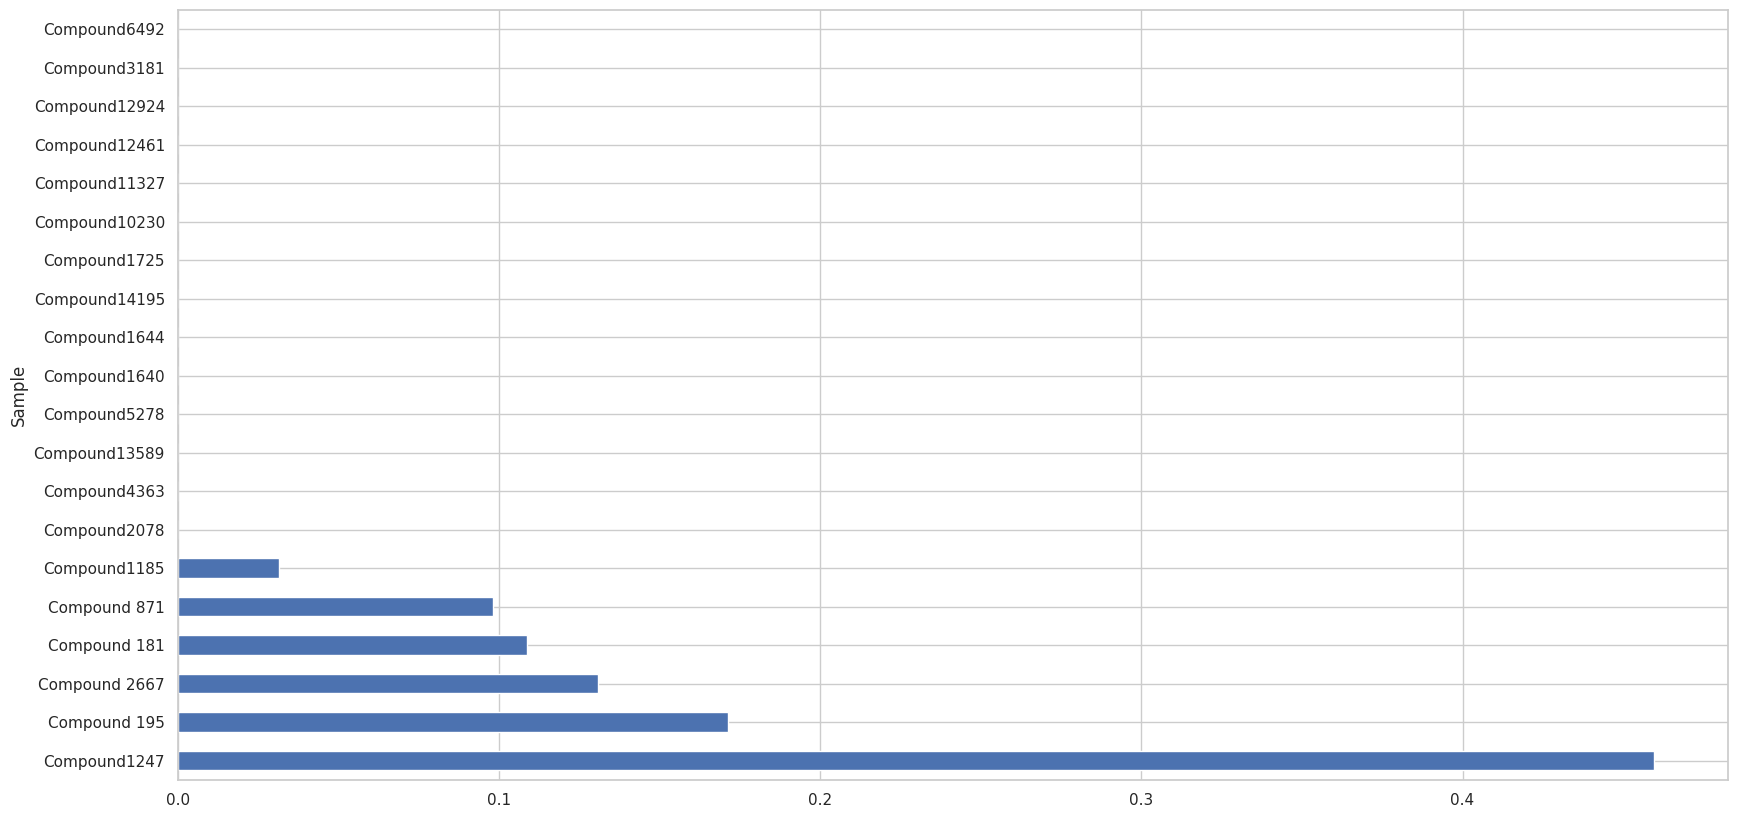

In [ ]:


#lets see each feature importance using XGB Classifier
import xgboost

x_sample = feature_data.drop(columns = ['Label'])
y_sample = feature_data['Label']

model = xgboost.XGBClassifier()
model.fit(x_sample,y_sample)

feat_imp = pd.Series(model.feature_importances_, index=x_sample.columns)
print(feat_imp.sort_values())
feat_imp.nlargest(20).plot(kind='barh',figsize=(20,10))

In [ ]:
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test = train_test_split(x_sample,y_sample, test_size = 0.2, random_state = 123)
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#using xgboost boosting algorithms
model_1 = xgboost.XGBClassifier()
model_1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model_1.predict(X_test)
metrics_1,cm_1 = test_results(y_pred, y_test)

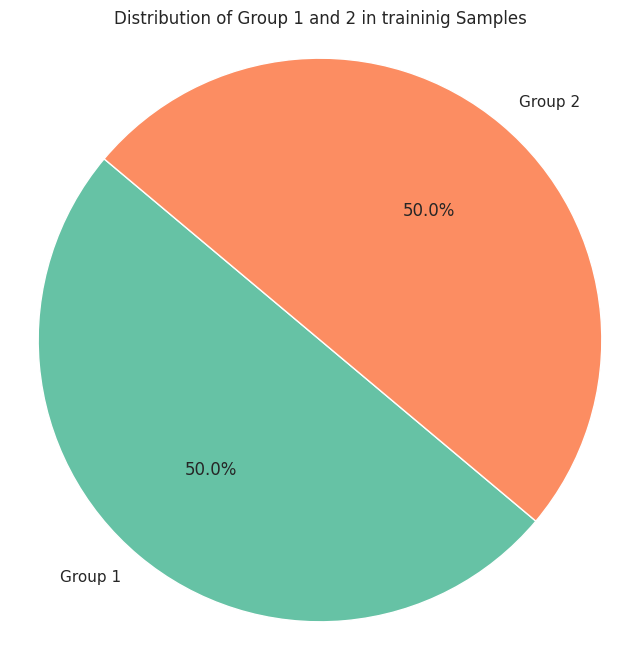

In [ ]:
group_counts = y_train.value_counts()
group1_count = group_counts[1]
group2_count = group_counts[0]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie([group1_count, group2_count], labels=['Group 1', 'Group 2'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Group 1 and 2 in traininig Samples')
plt.axis('equal')
plt.show()

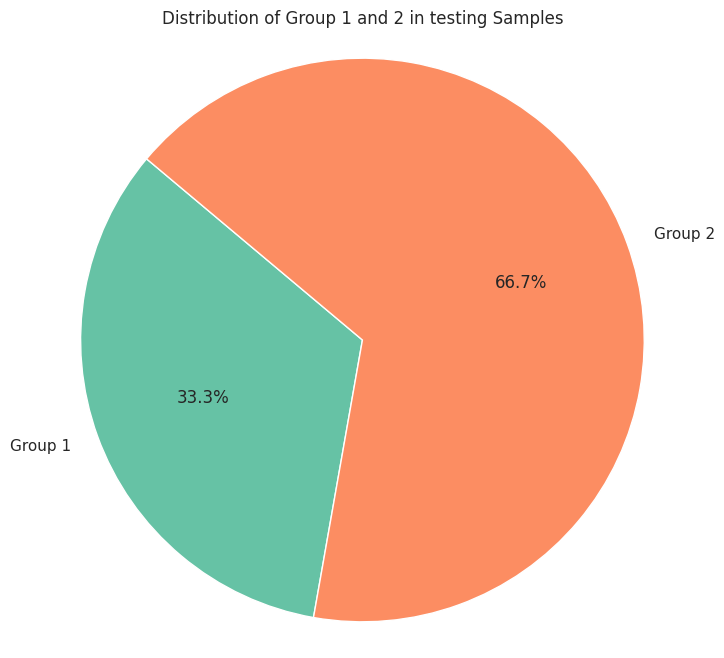

In [ ]:

group_counts = y_test.value_counts()
group1_count = group_counts[1]
group2_count = group_counts[0]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie([group1_count, group2_count], labels=['Group 1', 'Group 2'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Group 1 and 2 in testing Samples')
plt.axis('equal')
plt.show()

In [ ]:
def test_results(y_pred, y_test):
  results = {}
  results['Accuracy'] = accuracy_score(y_test,y_pred)
  results['Precision'] = precision_score(y_test,y_pred,average = 'weighted')
  results['Recall'] = recall_score(y_test,y_pred,average = 'weighted')
  results['F1_Score'] = f1_score(y_test,y_pred,average = 'weighted')

  cm = confusion_matrix(y_test,y_pred)
  return results,cm

In [ ]:
#using logistic regression algorithm
model_2 = LogisticRegression()
model_2.fit(X_train,y_train)

LogisticRegression()

In [ ]:

y_pred_2 = model_2.predict(X_test)
metrics_2, cm_2 = test_results(y_pred_2, y_test)
metrics_2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.6666666666666666,
 'Precision': 0.4444444444444444,
 'Recall': 0.6666666666666666,
 'F1_Score': 0.5333333333333333}

In [ ]:
#using SVM algorithm using various kernels
model_3 = svm.SVC(kernel = 'linear',probability = True)
model_4 = svm.SVC(kernel = 'poly',probability = True)
model_5 = svm.SVC(kernel = 'rbf',probability = True)

model_3.fit(X_train,y_train)
model_4.fit(X_train,y_train)
model_5.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
y_pred_3 = model_3.predict(X_test)
metrics_3, cm_3 = test_results(y_pred_3, y_test)

y_pred_4 = model_4.predict(X_test)
metrics_4, cm_4 = test_results(y_pred_4, y_test)

y_pred_5 = model_3.predict(X_test)
metrics_5, cm_5 = test_results(y_pred_5, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_6 = RandomForestClassifier(n_estimators = 1500, criterion = 'entropy', random_state = 42)
model_6.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1500, random_state=42)

In [ ]:
y_pred_6 = model_6.predict(X_test)
metrics_6,cm_6 = test_results(y_pred_6,y_test)
metrics_6

{'Accuracy': 0.8333333333333334,
 'Precision': 0.8666666666666667,
 'Recall': 0.8333333333333334,
 'F1_Score': 0.8148148148148149}

In [ ]:
#using ANN for classification
model_7 = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
y_pred_7 = model_7.predict(X_test)
y_pred_7 = (y_pred_7 >= 0.5).astype(int)
metrics_7,cm_7 = test_results(y_pred_7,y_test)

1/1 [==============================] - 1s 1s/step


<ipython-input-49-da2bf7d3d37b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = okk[1][:80], y = okk[0][:80], data = okk, palette='viridis')


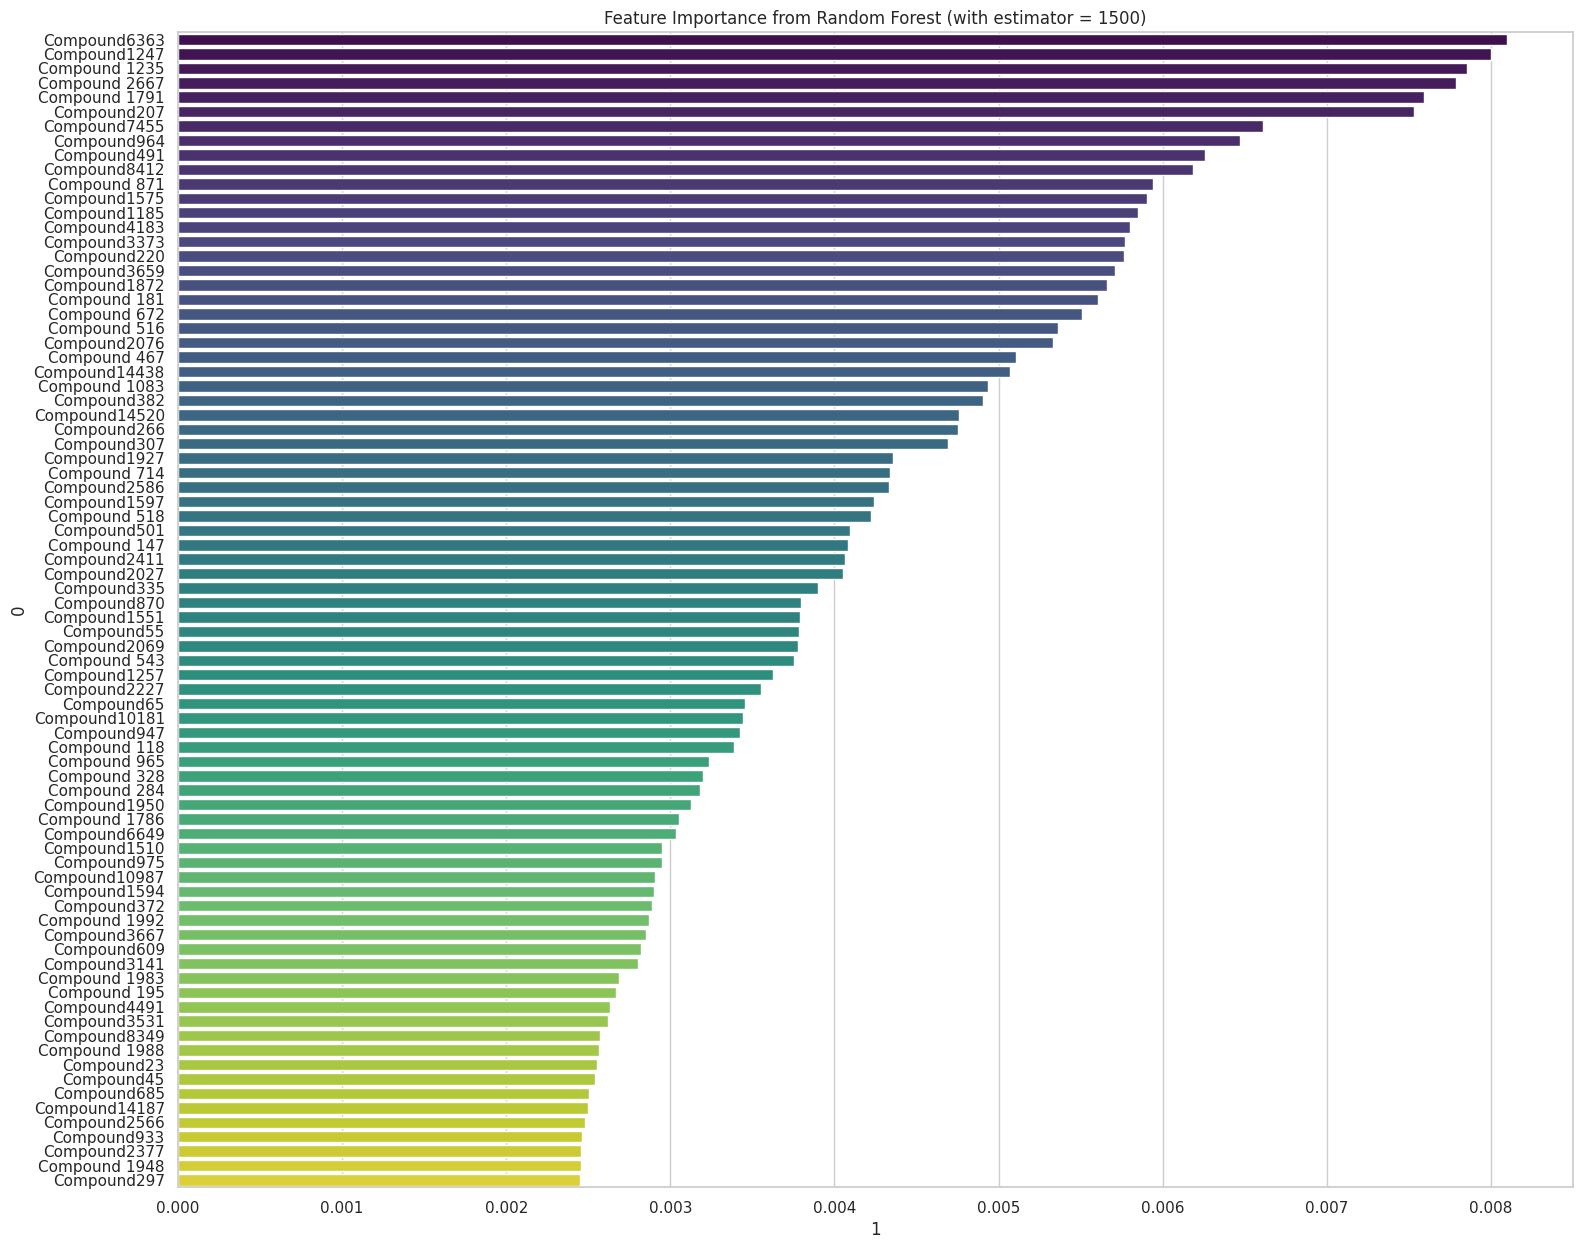

In [ ]:
feature_importance = model_6.feature_importances_
okk = pd.DataFrame([x_sample.columns, feature_importance]).T
okk = okk.sort_values(by = 1,ascending = False)
plt.figure(figsize=(18, 15))
sns.barplot(x = okk[1][:80], y = okk[0][:80], data = okk, palette='viridis')
plt.title("Feature Importance from Random Forest (with estimator = 1500)")
plt.show()

In [ ]:
model_list = {
    "XGBoost" : pd.Series(metrics_1),
    "Logistic_Regression" : pd.Series(metrics_2),
    "SVM_Linear" : pd.Series(metrics_3),
    "SVM_Polynomial" : pd.Series(metrics_4),
    "SVM_RBF" : pd.Series(metrics_5),
    "Random_Forest" : pd.Series(metrics_6),
}

pd.DataFrame(model_list).T

,Accuracy,Precision,Recall,F1_Score
XGBoost,0.833333,0.866667,0.833333,0.814815
Logistic_Regression,0.666667,0.444444,0.666667,0.533333
SVM_Linear,0.666667,0.444444,0.666667,0.533333
SVM_Polynomial,0.333333,0.111111,0.333333,0.166667
SVM_RBF,0.666667,0.444444,0.666667,0.533333
Random_Forest,0.833333,0.866667,0.833333,0.814815
